In [3]:
import lsst.pipe.tasks
from lsst.pipe.tasks import visualizeVisit
import lsst.afw.cameraGeom.utils as afwUtils
from lsst.daf.butler import Butler
import lsst.afw.image as afwImage
import matplotlib.pyplot as plt
import lsst.afw.math as afwMath
import numpy as np
import lsst.log
from lsst.afw.cameraGeom import FIELD_ANGLE, FOCAL_PLANE, PIXELS
import math
from astropy.visualization import ZScaleInterval

In [15]:
from lsst.pipe.tasks.maskStreaks import MaskStreaksTask, LineProfile

In [5]:
butler = Butler('/repo/main', collections='HSC/runs/RC2/w_2024_02/DM-42454')

In [6]:
interval = ZScaleInterval()

In [7]:
calexpRefs = list(butler.registry.queryDatasets('calexp', visit=11700))
len(calexpRefs)

103

In [8]:
camera = butler.get('camera', instrument='HSC')

In [47]:
binSize = 8

In [13]:
streakMaskTask = MaskStreaksTask()

In [131]:
#inputExps = {calRef.dataId['detector']: butler.get(calRef) for calRef in calexpRefs[:50]}
inputExps = {}
inputRefs = {}
streaks = {}
for calRef in calexpRefs:
    orig_image = butler.get(calRef)
    det = calRef.dataId['detector']
    binned = afwMath.binImage(orig_image.getMaskedImage(), binSize)
    inputExps[det] = afwImage.makeExposure(binned)
    inputRefs[det] = calRef

    streakFit = streakMaskTask.find(orig_image.getMaskedImage())
    streaks[det] = []
    if len(streakFit.originalLines) != 0:
        print(det, 'orig lines:', streakFit.originalLines)
    if len(streakFit.lines) != 0:
        lineProf = LineProfile(orig_image.image.array, orig_image.variance.array, line=streakFit.lines[0])
        for line in streakFit.lines:
            lineEnds = lineProf.getLineXY(line)
            streaks[det].append(lineEnds)
        print('   fit lines:', streakFit.lines)
inputExps.keys()


36 orig lines: Line(rho=-1539.779497673781, theta=127.20000000000127, sigma=0.0)
   fit lines: Line(rho=-1481.3426259852445, theta=126.95089781632882, sigma=66.32730497824961)
44 orig lines: Line(rho=-272.5794976735609, theta=126.40000000000126, sigma=0.0), Line(rho=-184.37949767356594, theta=125.20000000000124, sigma=0.0),...
70 orig lines: Line(rho=165.4205023264313, theta=57.400000000000276, sigma=0.0)
   fit lines: Line(rho=190.97398781519865, theta=57.655230064440254, sigma=76.14613364740424)
67 orig lines: Line(rho=-47.77949767356799, theta=122.2000000000012, sigma=0.0), Line(rho=-126.77949767356911, theta=126.00000000000125, sigma=0.0),...
   fit lines: Line(rho=-96.68404390202173, theta=126.00414975863045, sigma=75.64179817195584)
101 orig lines: Line(rho=-1069.379497673674, theta=141.8000000000005, sigma=0.0)
56 orig lines: Line(rho=-2051.7794976738933, theta=90.80000000000075, sigma=0.0)
   fit lines: Line(rho=-2067.792394680193, theta=91.51402142452221, sigma=16.235053846905

dict_keys([99, 86, 93, 36, 87, 33, 45, 80, 44, 7, 0, 15, 75, 21, 55, 76, 18, 43, 17, 72, 61, 70, 20, 10, 67, 40, 30, 42, 101, 56, 59, 49, 52, 71, 6, 1, 31, 11, 16, 54, 23, 35, 65, 57, 29, 73, 60, 12, 58, 97, 51, 90, 38, 79, 82, 69, 91, 63, 81, 96, 64, 22, 37, 50, 83, 28, 53, 103, 78, 48, 3, 62, 100, 41, 47, 34, 77, 13, 84, 25, 14, 102, 74, 5, 32, 24, 26, 27, 68, 95, 19, 66, 46, 4, 39, 2, 85, 89, 98, 8, 88, 92, 94])

In [86]:
inputStreakMasks = {}
for calRef in calexpRefs:
    orig_image = butler.get(calRef)
    streakMask = ((orig_image.mask.array & orig_image.mask.getPlaneBitMask('STREAK')) != 0)
    #orig_image.mask.array = streakMask
    binned = afwMath.binImage(streakMask, binSize)
    inputStreakMasks[calRef.dataId['detector']] = afwImage.makeExposure(binned)
inputStreakMasks.keys()

TypeError: binImage(): incompatible function arguments. The following argument types are supported:
    1. (inImage: lsst.afw.image._image.ImageU, binX: int, binY: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._image.ImageU
    2. (inImage: lsst.afw.image._image.ImageU, binsize: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._image.ImageU
    3. (inImage: lsst.afw.image._image.ImageI, binX: int, binY: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._image.ImageI
    4. (inImage: lsst.afw.image._image.ImageI, binsize: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._image.ImageI
    5. (inImage: lsst.afw.image._image.ImageF, binX: int, binY: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._image.ImageF
    6. (inImage: lsst.afw.image._image.ImageF, binsize: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._image.ImageF
    7. (inImage: lsst.afw.image._image.ImageD, binX: int, binY: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._image.ImageD
    8. (inImage: lsst.afw.image._image.ImageD, binsize: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._image.ImageD
    9. (inImage: lsst.afw.image._maskedImage.MaskedImageU, binX: int, binY: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._maskedImage.MaskedImageU
    10. (inImage: lsst.afw.image._maskedImage.MaskedImageU, binsize: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._maskedImage.MaskedImageU
    11. (inImage: lsst.afw.image._maskedImage.MaskedImageI, binX: int, binY: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._maskedImage.MaskedImageI
    12. (inImage: lsst.afw.image._maskedImage.MaskedImageI, binsize: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._maskedImage.MaskedImageI
    13. (inImage: lsst.afw.image._maskedImage.MaskedImageF, binX: int, binY: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._maskedImage.MaskedImageF
    14. (inImage: lsst.afw.image._maskedImage.MaskedImageF, binsize: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._maskedImage.MaskedImageF
    15. (inImage: lsst.afw.image._maskedImage.MaskedImageD, binX: int, binY: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._maskedImage.MaskedImageD
    16. (inImage: lsst.afw.image._maskedImage.MaskedImageD, binsize: int, flags: lsst.afw.math.Property = <Property.???: 4>) -> lsst.afw.image._maskedImage.MaskedImageD

Invoked with: array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 8

In [81]:
((orig_image.mask.array & orig_image.mask.getPlaneBitMask('STREAK')) != 0).astype(float)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
#imageSource = ImageSource(calexpRefs[:20])
imageSource = visualizeVisit.ImageSource(inputExps)

In [25]:
inputExps[0].getImage()

lsst.afw.image._image.ImageF=[[  7.782076    7.786339    7.7907324 ...  16.73121    16.722042
   16.712893 ]
 [  7.7670727   7.7713375   7.775612  ...  16.724884   16.715729
   16.706589 ]
 [  7.751954    7.7563434   7.760619  ...  16.718544   16.709522
   16.700396 ]
 ...
 [-93.90139   -93.604     -93.30748   ...  -1.841678   -1.8129249
   -1.7842073]
 [-94.053276  -93.75548   -93.45844   ...  -1.8259665  -1.797095
   -1.76826  ]
 [-94.20532   -93.90713   -93.60969   ...  -1.8101406  -1.7812736
   -1.7523204]], bbox=(minimum=(0, 0), maximum=(2047, 4175))

In [23]:
imageSource = visualizeVisit.ImageSource(inputExps)

In [45]:
# This is copied in here so that I could do some debugging.

def makeImageFromCamera(camera, detectorNameList=None, background=np.nan, bufferSize=10,
                        imageSource=afwUtils.FakeImageDataSource(), imageFactory=afwImage.ImageU, binSize=1):
    """Make an Image of a Camera.

    Put each detector's image in the correct location and orientation on the
    focal plane. The input images can be binned to an integer fraction of their
    original bboxes.

    Parameters
    ----------
    camera : `lsst.afw.cameraGeom.Camera`
        Camera object to use to make the image.
    detectorNameList : `list` [`str`]
        List of detector names from ``camera`` to use in building the image.
        Use all Detectors if `None`.
    background : `float`
        Value to use where there is no Detector.
    bufferSize : `int`
        Size of border in binned pixels to make around the camera image.
    imageSource : `FakeImageDataSource` or `None`
        Source to get ccd images.  Must have a ``getCcdImage()`` method.
    imageFactory : callable like `lsst.afw.image.Image`
        Type of image to build.
    binSize : `int`
        Bin the image by this factor in both dimensions.

    Returns
    -------
    image : `lsst.afw.image.Image`
        Image of the entire camera.
    """
    log = lsst.log.Log.getLogger(__name__).getChild("makeImageFromCamera")

    if detectorNameList is None:
        ccdList = camera
    else:
        ccdList = [camera[name] for name in detectorNameList]

    if detectorNameList is None:
        camBbox = camera.getFpBBox()
    else:
        camBbox = lsst.geom.Box2D()
        for detName in detectorNameList:
            for corner in camera[detName].getCorners(FOCAL_PLANE):
                camBbox.include(corner)
    print('Camera bbox in focal plane:', camBbox)
    pixelSize_o = camera[next(camera.getNameIter())].getPixelSize()
    camBbox = afwUtils.getCameraImageBBox(camBbox, pixelSize_o, bufferSize*binSize)
    print('In some other units:', camBbox)
    origin = camBbox.getMin()
    print('Cam im:', int(math.ceil(camBbox.getDimensions().getX()/binSize)),
                         int(math.ceil(camBbox.getDimensions().getY()/binSize)))
    camIm = imageFactory(int(math.ceil(camBbox.getDimensions().getX()/binSize)),
                         int(math.ceil(camBbox.getDimensions().getY()/binSize)))
    camIm[:] = imageSource.background

    assert imageSource.isTrimmed, "isTrimmed is False isn't supported by getCcdInCamBBoxList"

    boxList = afwUtils.getCcdInCamBBoxList(ccdList, binSize, pixelSize_o, origin)
    for det, bbox in zip(ccdList, boxList):
        im = imageSource.getCcdImage(det, imageFactory, binSize)[0]
        #binned = afwMath.binImage(im, binSize)
        if binned is None:
            continue

        imView = camIm.Factory(camIm, bbox, afwImage.LOCAL)
        #print(imView.array.shape, im.array.shape, binned.array.shape)
        imView[:] = im
        #try:
        #    imView[:] = im
        #except pexExceptions.LengthError as e:
        #    log.error("Unable to fit image for detector \"%s\" into image of camera: %s",
        #              det.getName(), e)

    return camIm

In [46]:
image = afwUtils.makeImageFromCamera(
            camera, detectorNameList=inputExps.keys(), imageSource=imageSource, imageFactory=afwImage.ImageF, binSize=binSize,
        )
# This is just to print some info from `makeImageFromCamera` without having to actually mess with afw
imageAlt = makeImageFromCamera(
            camera, detectorNameList=inputExps.keys(), imageSource=imageSource, imageFactory=afwImage.ImageF, binSize=binSize,
        )

Camera bbox in focal plane: (minimum=(-238.33, -261.65), maximum=(238.29, 267.64))
In some other units: (minimum=(-15969, -17524), maximum=(15965, 17922))
Cam im: 3992 4431


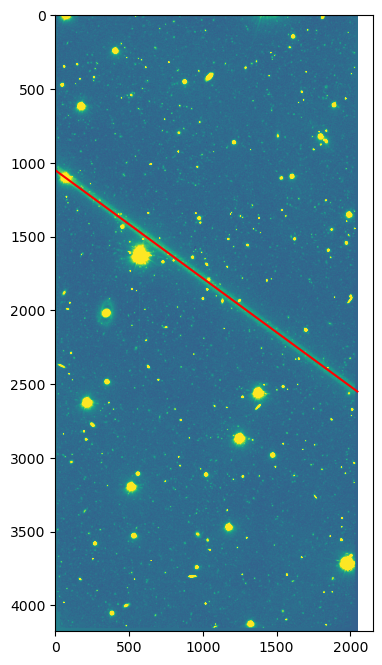

In [70]:
# Get sample streak (I chose line ends by-eye)
det = 44
testExp = butler.get(inputRefs[det])
vmin, vmax = interval.get_limits(testExp.image.array)
fig = plt.figure(figsize=(8, 8))
plt.imshow(testExp.image.array, vmin=vmin, vmax=vmax)
lineEnds = [[0, 2048], [1050, 2550]]
plt.plot(lineEnds[0], lineEnds[1], color='r')

In [39]:
lineEndPairs = [[[0., 2048.], [1050., 2550.]]]
det = 44
fp_lines = []
for lineEnd in lineEndPairs:
    detector = camera[det]
    map = detector.getTransform(PIXELS, FOCAL_PLANE).getMapping()

    fp_line = map.applyForward(np.array(lineEnd))
    fp_lines.append(fp_line)

In [40]:
fp_lines[0]

array([[ 47.21396297,  16.49878779],
       [184.74179129, 162.23520529]])

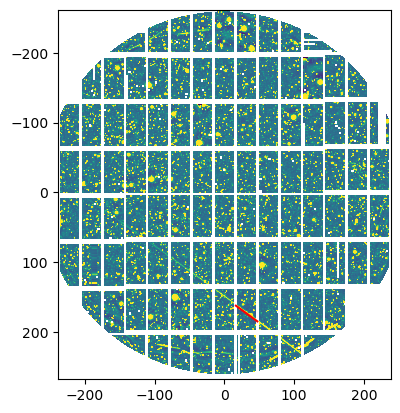

In [73]:
vmin, vmax = interval.get_limits(image.array)

#plt.imshow(image.array, vmin=vmin, vmax=vmax, extent=[-238.33,238.28,-261.65, 267.64])
plt.imshow(image.array, vmin=vmin, vmax=vmax, extent=[-238.33,238.28,267.64,-261.65])
for line in fp_lines:
    plt.plot(line[0], line[1], color='r')

In [38]:
fp_lines = []
for det, lineEndPairs in streaks.items():
    if len(lineEnds) > 0:
        detector = camera[det]
        map = detector.getTransform(PIXELS, FOCAL_PLANE).getMapping()
        for lineEndPair in lineEndPairs:
            fp_line = map.applyForward(np.array([lineEndPair[:, 0], lineEndPair[:, 1]]))
            fp_lines.append(fp_line)

In [115]:
# Get ccd label locations:
det_labels = {}
for det in camera:
    if det.getId() > 103: continue
    map = det.getTransform(PIXELS, FOCAL_PLANE).getMapping()
    fp_xy = map.applyForward([500, 500])
    det_labels[det.getId()] = fp_xy

In [135]:
# Working on alternate way to transform ccd image to focal plane...
trans = camera[42].getTransform(PIXELS, FOCAL_PLANE)
print(camera[42].getId())
trans.getJacobian(lsst.geom.Point2D(0, 0))
trans.applyForward(lsst.geom.Point2D(0, 0))
import matplotlib.transforms as mtransforms
affine = mtransforms.Affine2D()
offset = trans.applyForward(lsst.geom.Point2D(0, 0))
print(offset)
affine.translate(offset[0], offset[1])

42
(47.224, 66.178)


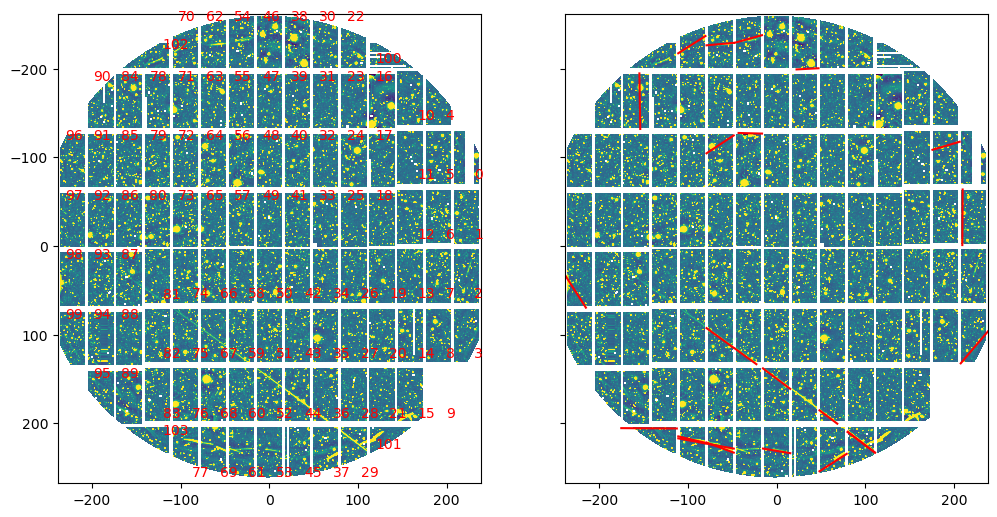

In [91]:
vmin, vmax = interval.get_limits(image.array)

fig, subs = plt.subplots(1,2, figsize=(12, 8), sharex=True, sharey=True)
#plt.imshow(image.array, vmin=vmin, vmax=vmax, extent=[-238.33,238.28,-261.65, 267.64])

subs[0].imshow(image.array, vmin=vmin, vmax=vmax, extent=[-238.33,238.28,267.64,-261.65])
subs[1].imshow(image.array, vmin=vmin, vmax=vmax, extent=[-238.33,238.28,267.64,-261.65])

for det, loc in det_labels.items():
    subs[0].text(loc[0], loc[1], det, color='r')
for line in fp_lines:
    subs[1].plot(line[0], line[1], color='r')


In [71]:
# Test that `getCcdImage` gives reasonable results
imageSource.getCcdImage(camera[99], afwImage.ImageF, 4)

(lsst.afw.image._image.ImageF=[[ 7.7453527  6.532504   6.3981524 ...  2.0609798 16.791605  16.72234  ]
  [ 7.628029   5.6643696  1.566921  ...  9.2802305 16.738016  16.671959 ]
  [ 7.513646   6.2020407  3.4635909 ...  3.2826352 16.685669  16.622757 ]
  ...
  [       nan        nan        nan ... -2.576591  -2.3645344 -2.1476624]
  [       nan        nan        nan ... -2.4667883 -2.25067   -2.0296755]
  [       nan        nan        nan ... -2.3529615 -2.1327517 -1.9075786]], bbox=(minimum=(0, 0), maximum=(255, 521)),
 <lsst.afw.cameraGeom.Detector at 0x7fc9045b2330>)

36 [array([[ 712.44595962,    0.        ],
       [2048.        , 1004.61881831]])]
[ 89.05574495 256.        ] [  0.         125.57735229]


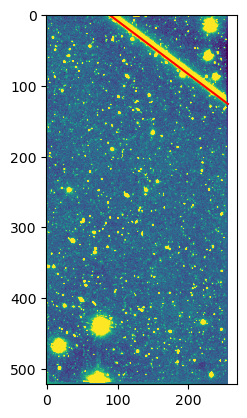

70 [array([[   0.        , 2962.51282673],
       [2048.        , 1665.58005299]])]
[  0. 256.] [370.31410334 208.19750662]


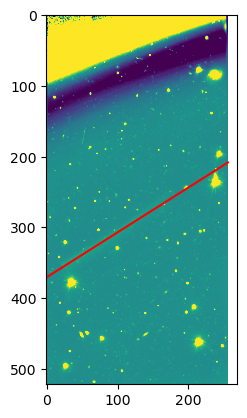

67 [array([[   0.        , 1224.39279111],
       [2048.        , 2712.57852907]])]
[  0. 256.] [153.04909889 339.07231613]


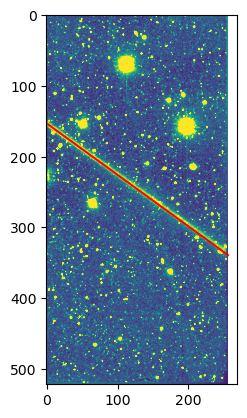

56 [array([[ 286.77463826,    0.        ],
       [2048.        ,   46.55061462]])]
[ 35.84682978 256.        ] [0.         5.81882683]


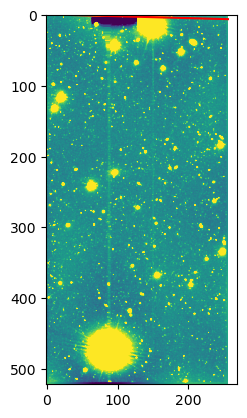

59 [array([[ 423.48095611,    0.        ],
       [2048.        , 1182.24532535]])]
[ 52.93511951 256.        ] [  0.         147.78066567]


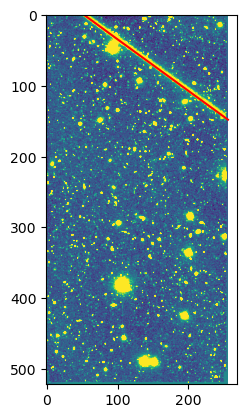

52 [array([[   0.        , 2618.00601629],
       [2048.        , 4159.86856048]])]
[  0. 256.] [327.25075204 519.98357006]


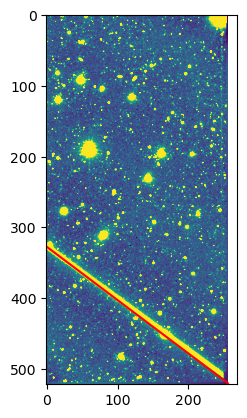

1 [array([[1927.63080393,    0.        ],
       [1903.06506436, 4176.        ]])]
[240.95385049 237.88313305] [  0. 522.]


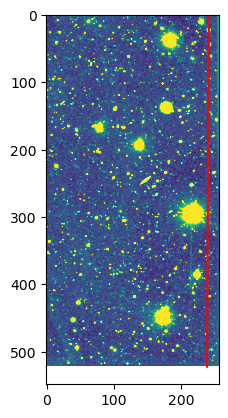

54 [array([[   0.        , 2174.43770558],
       [2048.        , 1604.6629482 ]])]
[  0. 256.] [271.8047132  200.58286852]


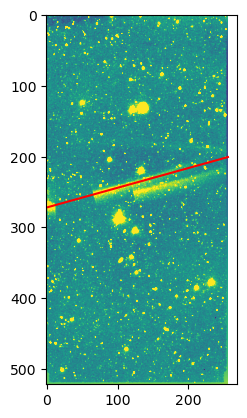

29 [array([[   0.        , 2302.61952863],
       [2048.        , 3853.52407458]]), array([[   0.        , 2309.94443701],
       [2048.        , 3858.60266994]])]
[  0. 256.] [287.82744108 481.69050932]
[  0. 256.] [288.74305463 482.32533374]


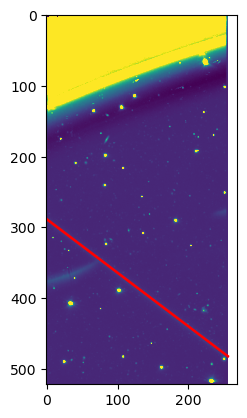

38 [array([[ 398.79792995, 4176.        ],
       [2048.        , 4089.77130074]])]
[ 49.84974124 256.        ] [522.         511.22141259]


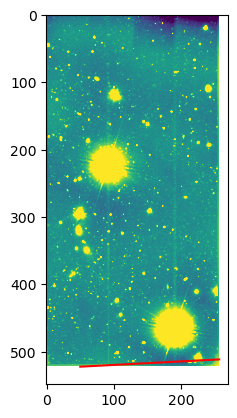

69 [array([[   0.        , 2604.79055505],
       [2048.        , 2980.5388202 ]]), array([[   0.        , 2301.96305967],
       [2048.        , 3061.45381255]])]
[  0. 256.] [325.59881938 372.56735252]
[  0. 256.] [287.74538246 382.68172657]


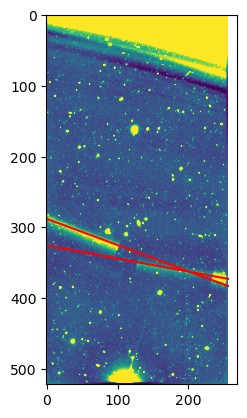

64 [array([[   0.        , 1529.19897757],
       [2048.        ,  183.79706406]])]
[  0. 256.] [191.1498722   22.97463301]


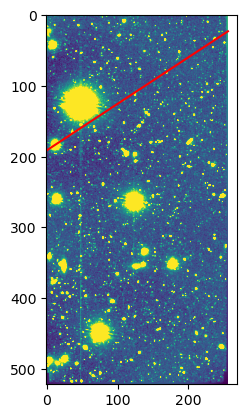

37 [array([[   0.        , 2214.1952521 ],
       [2048.        ,  899.74127828]])]
[  0. 256.] [276.77440651 112.46765979]


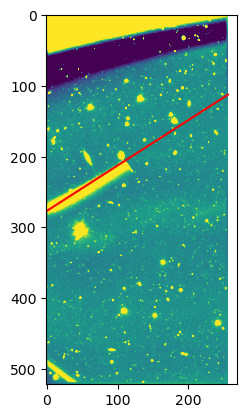

53 [array([[   0.        , 2260.20432778],
       [2048.        , 2604.76983084]])]
[  0. 256.] [282.52554097 325.59622885]


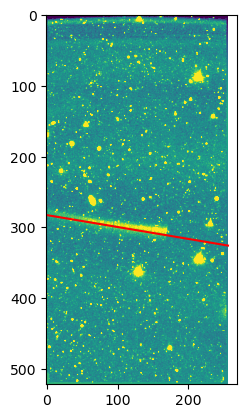

103 [array([[  57.01112641,    0.        ],
       [  32.53138492, 4176.        ]])]
[7.1263908  4.06642312] [  0. 522.]


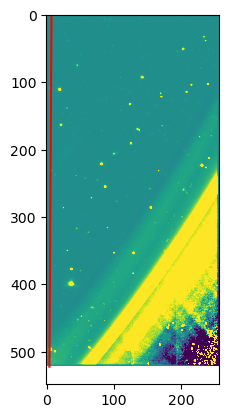

3 [array([[   0.        , 2464.30674662],
       [2048.        ,   61.31314482]])]
[  0. 256.] [308.03834333   7.6641431 ]


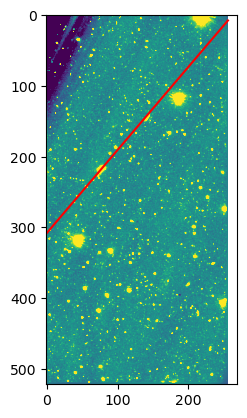

62 [array([[   0.        , 2366.35688346],
       [2048.        , 2180.45323455]])]
[  0. 256.] [295.79461043 272.55665432]


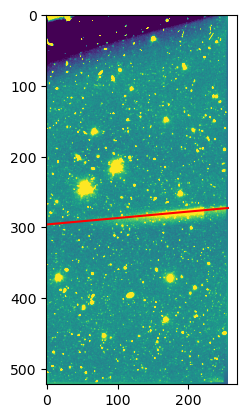

77 [array([[   0.        , 2993.03450058],
       [2048.        , 3374.71313262]]), array([[   0.        , 3041.20255693],
       [2048.        , 3524.96840773]])]
[  0. 256.] [374.12931257 421.83914158]
[  0. 256.] [380.15031962 440.62105097]


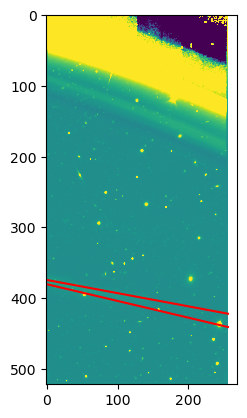

84 [array([[1321.65211502,    0.        ],
       [1388.19830032, 4176.        ]])]
[165.20651438 173.52478754] [  0. 522.]


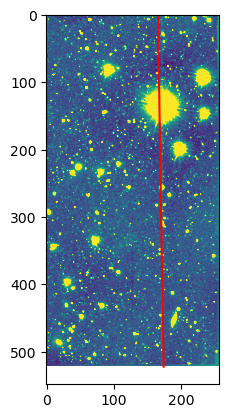

5 [array([[   0.        , 3288.11007969],
       [2048.        , 2683.05209321]])]
[  0. 256.] [411.01375996 335.38151165]


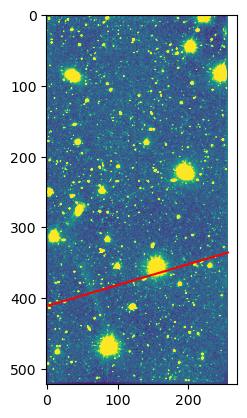

98 [array([[   0.        , 1753.80180327],
       [1548.14322813, 4176.        ]])]
[  0.         193.51790352] [219.22522541 522.        ]


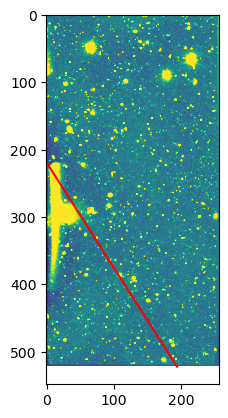

In [34]:
fp_lines = []
for det, lineEndPairs in streaks.items():
    if len(lineEndPairs) > 0:
        print(det, lineEndPairs)
        detector = camera[det]
        image = inputExps[det].getImage().array
        vmin, vmax = interval.get_limits(image)
        map = detector.getTransform(PIXELS, FOCAL_PLANE).getMapping()
        plt.figure()
        plt.imshow(image, vmin=vmin, vmax=vmax)
        for lineEnd in lineEndPairs:
            print(lineEnd[:, 0]/binSize, lineEnd[:, 1]/binSize)
            plt.plot(lineEnd[:, 0]/binSize, lineEnd[:, 1]/binSize, color='r')
        #for lineEndPair in lineEndPairs:
        #    fp_line = map.applyForward(np.array(lineEndPair))
        #    fp_lines.append(fp_line)
        plt.show()